In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import os 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_val,y_val) = mnist.load_data()

Text(0.5, 1.0, 'Ceci est un 2')

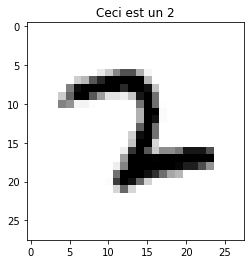

In [4]:
np.random.seed(9)

i = np.random.randint(0,len(x_train))

plt.imshow(x_train[i],cmap='gray_r',interpolation='none')
plt.title(f'Ceci est un {y_train[i]}')

In [6]:
(x_train,y_train),(x_val,y_val) = mnist.load_data()

## reshape and flatten
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_val =  x_val.reshape(x_val.shape[0], num_pixels).astype('float32')

## to_categories
y_train_cat, y_val_cat = to_categorical(y_train), to_categorical(y_val)

## normalisation min max 
x_train = x_train/255
x_val = x_val/255

In [7]:
from sklearn.model_selection import train_test_split

x_tr,x_ts,y_tr,y_ts = train_test_split(x_train,y_train_cat,test_size=0.2,random_state=9)

# MLP light

In [8]:
num_classes = y_tr.shape[1]

#creating a neural network

def neural_network_light(learning_rate=1e-2,input_dim=num_pixels):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.5))
    #model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))  #sigmoïde quand on est dans binary
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = neural_network_light(learning_rate=1e-3)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
960/960 [==============================] - 3s 3ms/step - loss: 0.3737 - accuracy: 0.8813 - val_loss: 0.1976 - val_accuracy: 0.9450
Epoch 2/5
960/960 [==============================] - 2s 2ms/step - loss: 0.3706 - accuracy: 0.8819 - val_loss: 0.1984 - val_accuracy: 0.9452
Epoch 3/5
960/960 [==============================] - 2s 2ms/step - loss: 0.3641 - accuracy: 0.8829 - val_loss: 0.1987 - val_accuracy: 0.9455
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 0.3651 - accuracy: 0.8843 - val_loss: 0.1928 - val_accuracy: 0.9475
Epoch 5/5
960/960 [==============================] - 4s 4ms/step - loss: 0.3620 - accuracy: 0.8829 - val_loss: 0.1934 - val_accuracy: 0.9479


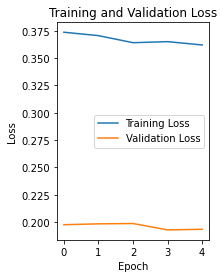

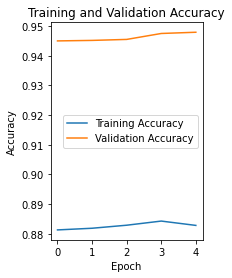

375/375 [==============================] - 1s 2ms/step - loss: 0.1934 - accuracy: 0.9479
Neural network accuracy: 94.79%


In [10]:
history = model.fit(x_tr, y_tr, validation_data=(x_ts, y_ts), epochs=5, batch_size=50,verbose=1)


plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

scores = model.evaluate(x_ts, y_ts)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

In [11]:
scores_val = model.evaluate(x_val, y_val_cat)
print("Neural network accuracy: %.2f%%" % (scores_val[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1822 - accuracy: 0.9471
Neural network accuracy: 94.71%


# heavy neural network


In [ ]:
#creating a neural network

def neural_network_heavy(learning_rate=1e-3,input_dim=num_pixels):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))  #sigmoïde quand on est dans binary
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = neural_network_light(learning_rate=1e-3)
model.summary()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

(x_train,y_train),(x_val,y_val) = mnist.load_data()

def neural_network_cnn(learning_rate=1e-3,p_out=0.25,input_dim=(x_train.shape[1], 32, 3)):
    model = Sequential()

    # Couche convolutive avec activation ReLU
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Ajout d'une seconde couche convolutive
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Ajout d'une troisième couche convolutive
    model.add(Conv2D(64, (3, 3), activation='relu'))

    # Aplatir la sortie pour l'alimenter dans des couches denses
    model.add(Flatten())

    # Couches denses
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 classes

    return model

model_cnn = neural_network_cnn(learning_rate=1e-3)
model_cnn.summary()

